In [11]:
import sys
import numpy as np
import matplotlib
import hyperspy
import skimage

print(f"Python version: {sys.version}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Hyperspy version: {hyperspy.__version__}")
print(f"Scikit-image version: {skimage.__version__}")


Python version: 3.11.14 | packaged by conda-forge | (main, Oct 22 2025, 22:35:28) [MSC v.1944 64 bit (AMD64)]
NumPy version: 1.26.4
Matplotlib version: 3.10.8
Hyperspy version: 2.3.0
Scikit-image version: 0.26.0


In [2]:
import os

base_dir = "assignment_01_output"
subdirs = [
    "data/raw",
    "data/processed",
    "figures",
    "src"
]

for subdir in subdirs:
    path = os.path.join(base_dir, subdir)
    os.makedirs(path, exist_ok=True)
    print(f"Created directory: {path}")

Created directory: assignment_01_output\data/raw
Created directory: assignment_01_output\data/processed
Created directory: assignment_01_output\figures
Created directory: assignment_01_output\src


In [3]:
import numpy as np

# Set the seed
np.random.seed(42)

# Generate random numbers
random_numbers = np.random.rand(5)
print(f"Random numbers: {random_numbers}")

Random numbers: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


In [4]:
import hyperspy

In [5]:
import py4DSTEM

ModuleNotFoundError: No module named 'py4DSTEM'

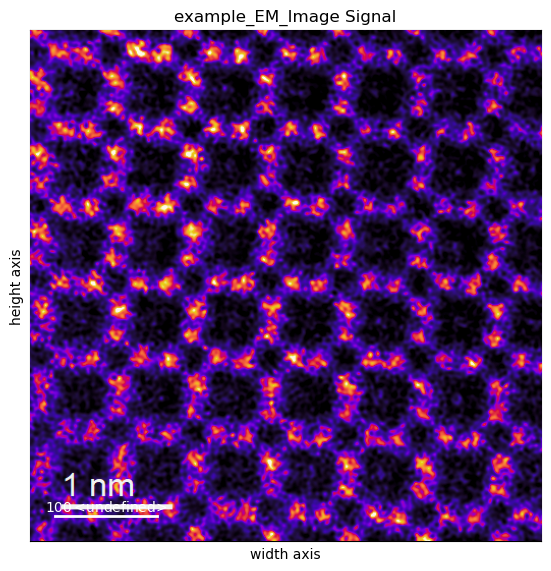

In [9]:
import hyperspy.api as hsa

s = hsa.load("example_EM_Image.tif")

s.plot()

In [22]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load the TIFF image
image = io.imread("example_EM_Image.tif")

# If the image is multi-channel, convert to grayscale by averaging
if image.ndim == 3:
    image_gray = image.mean(axis=2)
else:
    image_gray = image

# Compute basic statistics
mean_intensity = np.mean(image_gray)
std_intensity = np.std(image_gray)
min_intensity = np.min(image_gray)
max_intensity = np.max(image_gray)

mean_intensity, std_intensity, min_intensity, max_intensity

(59.01474651099369, 42.326238289384406, 0.0, 246.33333333333334)

**Mean intensity** represents the average brightness of the image, while  
**standard deviation** measures the contrast or spread of pixel intensities.

A higher standard deviation indicates stronger intensity variation, whereas
a lower value suggests a more uniform image.

In addition to the mean and standard deviation, the minimum and maximum
intensity values describe the full dynamic range of the image.

- The **minimum intensity** corresponds to the darkest pixels.
- The **maximum intensity** corresponds to the brightest pixels.
- Together, these values help identify potential saturation or clipping.



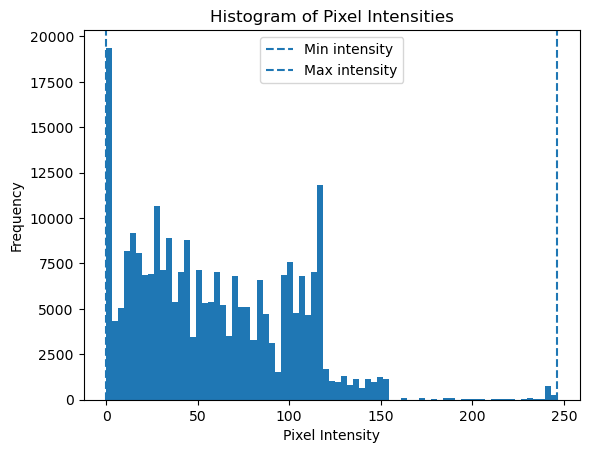

In [6]:
plt.figure()
plt.hist(image_gray.flatten(), bins=75)
plt.axvline(min_intensity, linestyle="--", label="Min intensity")
plt.axvline(max_intensity, linestyle="--", label="Max intensity")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Histogram of Pixel Intensities")
plt.legend()
plt.show()


The histogram shows the distribution of pixel intensities in the image.

- Peaks indicate intensity values that occur frequently.
- A narrow distribution suggests low contrast.
- A wide distribution indicates high contrast.
- Skewness toward low or high intensities can imply underexposed or overexposed regions.
- The distribution is a little bit left-shifted, means that the photo is slightly dark. We can also know this through the Mean intensity value.

The dashed lines indicate the minimum and maximum pixel intensities.

If these values lie at the edges of the histogram, it may indicate saturation
or clipping in the image acquisition process.



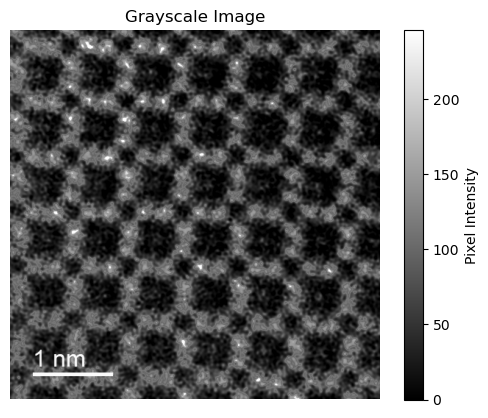

In [8]:
plt.figure()
plt.imshow(image_gray, cmap="gray")
plt.colorbar(label="Pixel Intensity")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()



The grayscale image visualization helps correlate the histogram features
with spatial regions in the image, allowing us to identify bright and dark areas.
